<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0205_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필수과제 
- 날씨데이터(기상청 데이터) 다운로드 받아서 원하는 지역으로 설정
- 날씨 데이터와 요인이 있을 것 같은 사회적인 변수, 경제 데이터, 소비자 데이터 등을 다운로드 받아 시계열 데이터 인덱스를 기준으로 해서 하나의 데이터 컬럼으로 병합
- 데이터 분석에 필요한 전처리 후 시각화를 진행해 실제 본인의 가설이 시각적으로 어떻게 나오는지 확인
- 데이터 범위는 최소 1~2년 / 일자별 or 월별 데이터

## 데이터 불러오기

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/날씨 데이터.csv', encoding = 'cp949')
exchange = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/환율 데이터.csv', encoding = 'cp949')

In [3]:
weather

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,2022-01-01,-4.3,-10.2,2.3
1,108,서울,2022-01-02,-1.3,-5.2,3.0
2,108,서울,2022-01-03,-1.9,-8.0,2.5
3,108,서울,2022-01-04,-2.5,-5.6,1.0
4,108,서울,2022-01-05,-2.8,-7.8,1.9
...,...,...,...,...,...,...
400,108,서울,2023-02-05,1.7,-3.3,7.1
401,108,서울,2023-02-06,3.0,-1.7,8.8
402,108,서울,2023-02-07,3.5,-0.6,9.5
403,108,서울,2023-02-08,2.1,-1.3,7.8


In [4]:
exchange

,일자,기준환율
0,2022-01-03,"1,185.50"
1,2022-01-04,"1,190.80"
2,2022-01-05,"1,194.30"
3,2022-01-06,"1,198.20"
4,2022-01-07,"1,199.60"
...,...,...
270,2023-02-06,"1,227.20"
271,2023-02-07,"1,247.50"
272,2023-02-08,"1,256.00"
273,2023-02-09,"1,257.10"


## 데이터 병합

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        405 non-null    int64  
 1   지점명       405 non-null    object 
 2   일시        405 non-null    object 
 3   평균기온(°C)  405 non-null    float64
 4   최저기온(°C)  404 non-null    float64
 5   최고기온(°C)  404 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 19.1+ KB


In [6]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      275 non-null    object
 1   기준환율    275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [7]:
# 일자를 기준으로 데이터 병합
data = pd.merge(weather, exchange, left_on = ['일시'], right_on = ['일자'])
data

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일자,기준환율
0,108,서울,2022-01-03,-1.9,-8.0,2.5,2022-01-03,"1,185.50"
1,108,서울,2022-01-04,-2.5,-5.6,1.0,2022-01-04,"1,190.80"
2,108,서울,2022-01-05,-2.8,-7.8,1.9,2022-01-05,"1,194.30"
3,108,서울,2022-01-06,-2.2,-5.9,3.3,2022-01-06,"1,198.20"
4,108,서울,2022-01-07,-1.6,-5.9,4.5,2022-01-07,"1,199.60"
...,...,...,...,...,...,...,...,...
264,108,서울,2023-02-03,-1.6,-3.9,3.4,2023-02-03,"1,219.30"
265,108,서울,2023-02-06,3.0,-1.7,8.8,2023-02-06,"1,227.20"
266,108,서울,2023-02-07,3.5,-0.6,9.5,2023-02-07,"1,247.50"
267,108,서울,2023-02-08,2.1,-1.3,7.8,2023-02-08,"1,256.00"


In [8]:
data = data.drop(['일자'], axis = 'columns')
data

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),기준환율
0,108,서울,2022-01-03,-1.9,-8.0,2.5,"1,185.50"
1,108,서울,2022-01-04,-2.5,-5.6,1.0,"1,190.80"
2,108,서울,2022-01-05,-2.8,-7.8,1.9,"1,194.30"
3,108,서울,2022-01-06,-2.2,-5.9,3.3,"1,198.20"
4,108,서울,2022-01-07,-1.6,-5.9,4.5,"1,199.60"
...,...,...,...,...,...,...,...
264,108,서울,2023-02-03,-1.6,-3.9,3.4,"1,219.30"
265,108,서울,2023-02-06,3.0,-1.7,8.8,"1,227.20"
266,108,서울,2023-02-07,3.5,-0.6,9.5,"1,247.50"
267,108,서울,2023-02-08,2.1,-1.3,7.8,"1,256.00"


## 데이터 전처리 및 EDA

In [9]:
# 데이터 내 결측치 확인
data.isna().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    1
최고기온(°C)    1
기준환율        0
dtype: int64

In [10]:
data_new = data.dropna()
data_new

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),기준환율
0,108,서울,2022-01-03,-1.9,-8.0,2.5,"1,185.50"
1,108,서울,2022-01-04,-2.5,-5.6,1.0,"1,190.80"
2,108,서울,2022-01-05,-2.8,-7.8,1.9,"1,194.30"
3,108,서울,2022-01-06,-2.2,-5.9,3.3,"1,198.20"
4,108,서울,2022-01-07,-1.6,-5.9,4.5,"1,199.60"
...,...,...,...,...,...,...,...
263,108,서울,2023-02-02,-2.4,-5.1,1.4,"1,231.40"
264,108,서울,2023-02-03,-1.6,-3.9,3.4,"1,219.30"
265,108,서울,2023-02-06,3.0,-1.7,8.8,"1,227.20"
266,108,서울,2023-02-07,3.5,-0.6,9.5,"1,247.50"


In [11]:
# 필요없는 컬럼 삭제 = 지점, 지점명
data_new = data_new.drop(['지점', '지점명'], axis = 'columns')
data_new

,일시,평균기온(°C),최저기온(°C),최고기온(°C),기준환율
0,2022-01-03,-1.9,-8.0,2.5,"1,185.50"
1,2022-01-04,-2.5,-5.6,1.0,"1,190.80"
2,2022-01-05,-2.8,-7.8,1.9,"1,194.30"
3,2022-01-06,-2.2,-5.9,3.3,"1,198.20"
4,2022-01-07,-1.6,-5.9,4.5,"1,199.60"
...,...,...,...,...,...
263,2023-02-02,-2.4,-5.1,1.4,"1,231.40"
264,2023-02-03,-1.6,-3.9,3.4,"1,219.30"
265,2023-02-06,3.0,-1.7,8.8,"1,227.20"
266,2023-02-07,3.5,-0.6,9.5,"1,247.50"


In [12]:
data_new.describe()

,평균기온(°C),최저기온(°C),최고기온(°C)
count,267.000000,267.000000,267.000000
mean,11.794757,7.730712,16.586891
std,11.362124,11.641785,11.228007
min,-11.800000,-17.300000,-8.600000
25%,1.350000,-3.300000,6.500000
50%,12.900000,7.800000,17.800000
75%,21.100000,17.200000,26.450000
max,30.700000,27.300000,34.400000


In [13]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


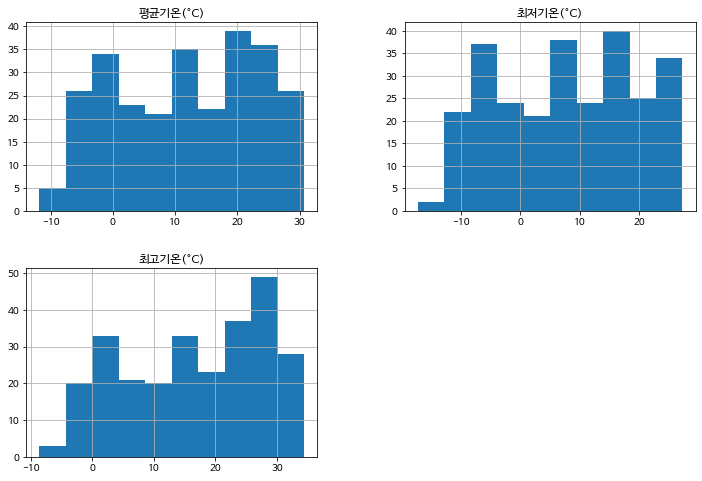

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]
data_new.hist(figsize=(12,8));

가설 : 평균기온의 높낮이가 심할수록 기준환율의 등락도 크다.

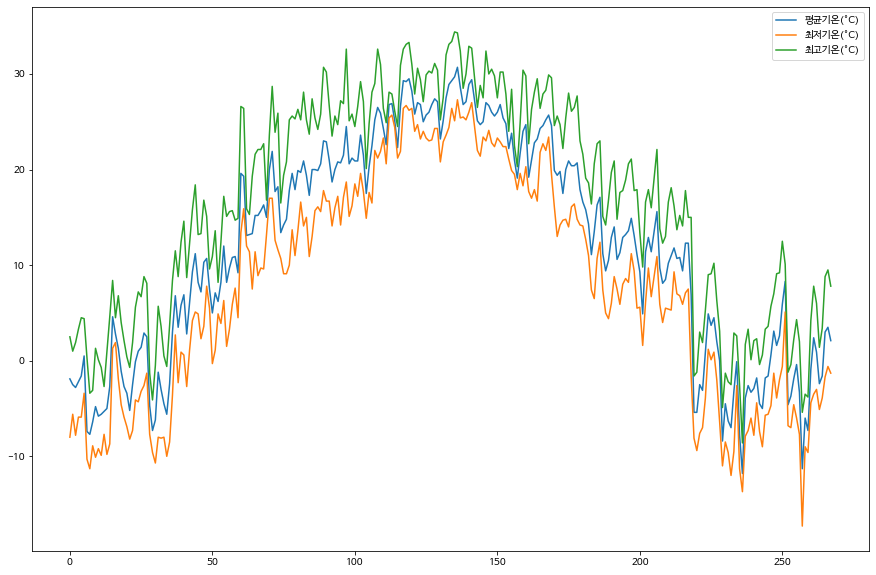

In [15]:
plt.plot(data_new[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)']])
plt.legend(('평균기온(°C)', '최저기온(°C)', '최고기온(°C)'))

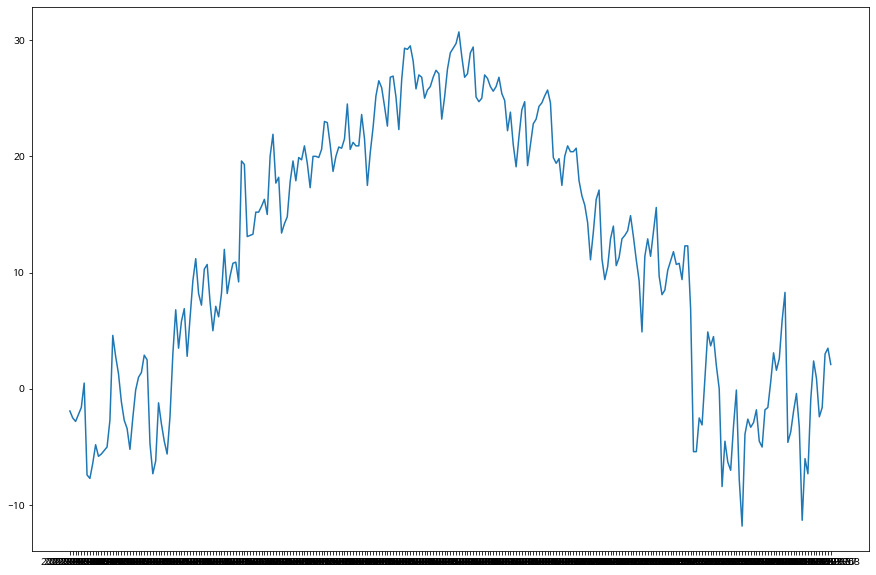

In [16]:
# 일시별 평균기온 시각화
X = data_new['일시']
y = data_new['평균기온(°C)']
plt.plot(X,y)

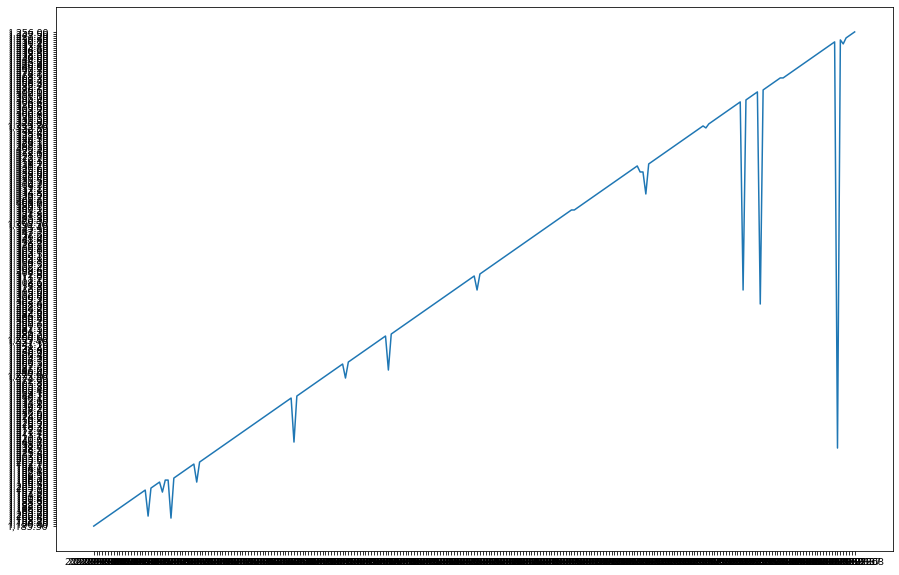

In [17]:
# 일시별 평균기온 시각화
X = data_new['일시']
y = data_new['기준환율']
plt.plot(X,y)

시각적으로만 보았을 때, 기온 높낮이가 큰 겨울에 기준환율도 마찬가지로 등락이 큰 것을 볼 수 있다. 하지만 기온이 기준환율의 절대적인 요소는 아닐 것이다. 두 그래프를 합쳐서 나타냈으면 더 좋았을 것 같다.